Compute the time evolution of a 2 ion system contructed to simulate electron transfer 
with 1 mode or 2 modes.

Compare the result using 1 mode (PRXpapaer), 2 mode (special interaction frame), time dependent H (ordinary frame)
and test the validity of changing interaction frames. 

To save computation time, cutoff = 10 is used for phonon space, note this will not give the precise time evolution but 
it is sufficient to verify the consistency between the last 2 frames.
cutoff = 20 will reproduce the result in example 2a

In [10]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import Qsim.operator.spin as spin
import Qsim.operator.phonon as phon
import Qsim.ion_chain.transfer.elec_transfer as etrans
#import Qsim.ion_chain.ising.ising_ce as isce
from  Qsim.ion_chain.ion_system import *
import Qsim.operator.spin_phonon as sp_op
plt.rcParams['figure.dpi']= 200

In [2]:
delta = 20 #detuning from com mode
ion_sys = ions(trap_config = {'N':2,'fx':2,'fz':1}) #construct a two ion system using class ions
ion_sys.coolant = [1] #ion 2 as coolant
ion_sys.active_phonon = [[0]] #consider only com mode
ion_sys.gamma = [0.05*np.abs(delta)/(2*np.pi),0] #cool com mode
ion_sys.active_spin = [0]
ion_sys.pcut = [[10]]
ion_sys.update_all(print_text = False)
ion_sys.list_para() #print parameters

Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
Ions class object initialized.
________________________________________________________________
********************Setup of the Trap************************
number of ions 2
Axial COM (Confining) frequency  1  [MHz]
Radial COM (Confining) frequency  2 [MHz]
Axial vibrational eigenfrequency [1.   1.73] MHz
Radial (Transverse) vibrational eigenfrequency [2.   1.73] [MHz]
Modulation Amplitude for parameteric amplification:  [0] [V]
Modulation Frequency for parameteric amplification:  [0] [MHz]
Trap dimension parameter:  200 [um]
                                                                 
********************Config of Numeric Calculation*************

In [3]:
laser1 = Laser()
laser1.Omega_eff = 70
laser1.wavevector = 1 
laser1.laser_couple = [0]
laser1.mu = 1e3*ion_sys.fx-delta
laser1.list_para()

Laser parameters updated
Lasers class object initialized.
                                                                 
********************Parameters of Laser Drive************************
Vibrational degree of freedom couples to the laser: Transverse (Radial)
index of ions that couple to the laser field:  [0]
Effective rabi frequency  70  [kHz]
Effective laser frequency  1980.0  [kHz]
Laser phase phis 0.0
(input in rad but displayed in degs)


In [4]:
Omegax = 0.01*np.abs(delta)
deltaE = -5*np.abs(delta) #note site energy difference is negative by definition  
elist = [sp_op.spin_measure(ion_sys,[0,1])]
#solve time evolution for a single energy splitting
H0  = etrans.H_res(Omegax,deltaE,ion_sys,laser1)
clist1 = sp_op.c_op(ion_sys,[0.01],False)
rho0 = sp_op.rho_thermal(ion_sys,nbar_list=[[0.01]],s_state=[0],ket = False)
tplot = np.arange(0,100,1)
times = tplot*2*np.pi/(2*np.pi*np.abs(delta))
print("solving time evolution (1 mode) for deltaE =", deltaE)
result = mesolve(H0,rho0,times,clist1,elist,progress_bar=True,options=Options(nsteps=100000))
rhoee1 = result.expect[0]

solving time evolution (1 mode) for deltaE = -100
10.0%. Run time:   0.06s. Est. time left: 00:00:00:00
20.0%. Run time:   0.13s. Est. time left: 00:00:00:00
30.0%. Run time:   0.21s. Est. time left: 00:00:00:00
40.0%. Run time:   0.28s. Est. time left: 00:00:00:00
50.0%. Run time:   0.36s. Est. time left: 00:00:00:00
60.0%. Run time:   0.44s. Est. time left: 00:00:00:00
70.0%. Run time:   0.51s. Est. time left: 00:00:00:00
80.0%. Run time:   0.59s. Est. time left: 00:00:00:00
90.0%. Run time:   0.67s. Est. time left: 00:00:00:00
Total run time:   0.74s


In [5]:
#%%
#simulation with 2 modes, use cutoff 2 for first mode because we are only cooling com mode
ion_sys.gamma = [0.05*np.abs(delta)/(2*np.pi),0]
ion_sys.active_phonon = [[0,1]] 
ion_sys.pcut = [[10,2]]
elist2 = [sp_op.spin_measure(ion_sys,[0])]
ion_sys.list_para() 

________________________________________________________________
********************Setup of the Trap************************
number of ions 2
Axial COM (Confining) frequency  1  [MHz]
Radial COM (Confining) frequency  2 [MHz]
Axial vibrational eigenfrequency [1.   1.73] MHz
Radial (Transverse) vibrational eigenfrequency [2.   1.73] [MHz]
Modulation Amplitude for parameteric amplification:  [0] [V]
Modulation Frequency for parameteric amplification:  [0] [MHz]
Trap dimension parameter:  200 [um]
                                                                 
********************Config of Numeric Calculation************************
index of phonon space included in simulation:  [[0, 1]]
corresonding phonon space cutoff  [[10, 2]]
********************Config of Cooling************************
Effective cooling rate  [0.16 0.  ]  [kHz]
Coolant index  [1]
Motional degree of freedom to be cooled:  1
********************Config of Trap Modulation************************
 Modulation Amplitud

In [6]:
#%%
#solve time evolution for a single energy splitting
H0  = etrans.H_res(Omegax,deltaE,ion_sys,laser1)
clist2 = sp_op.c_op(ion_sys,[0.01,0.01],False)
rho0 = sp_op.rho_thermal(ion_sys,nbar_list=[[0.01,0.01]],s_state=[0],ket = False)
print("__________________________________________________________")
print("solving time evolution (2 mode) for deltaE =", deltaE)
result2 = mesolve(H0,rho0,times,clist2,elist2,progress_bar=True,options=Options(nsteps=10000))
rhoee2 = result2.expect[0]

__________________________________________________________
solving time evolution (2 mode) for deltaE = -100
10.0%. Run time:   0.51s. Est. time left: 00:00:00:04
20.0%. Run time:   0.98s. Est. time left: 00:00:00:03
30.0%. Run time:   1.45s. Est. time left: 00:00:00:03
40.0%. Run time:   1.92s. Est. time left: 00:00:00:02
50.0%. Run time:   2.38s. Est. time left: 00:00:00:02
60.0%. Run time:   2.84s. Est. time left: 00:00:00:01
70.0%. Run time:   3.31s. Est. time left: 00:00:00:01
80.0%. Run time:   3.79s. Est. time left: 00:00:00:00
90.0%. Run time:   4.27s. Est. time left: 00:00:00:00
Total run time:   4.70s


In [7]:
#%%
#simulation with complete H, solving time dependent H cost more time
ion_sys.active_phonon = [[0,1]] 
ion_sys.pcut = [[10,2]]
ion_sys.gamma = [0.05*np.abs(delta)/(2*np.pi),0]
elist3 = [sp_op.spin_measure(ion_sys,[0])]
ion_sys.list_para()
rho0 = sp_op.rho_thermal(ion_sys,[[0.01,0.01]],s_state=[0],ket = False)
Hce, arg0 = etrans.H_ord(Omegax,deltaE,ion_sys,laser1)
clist3 = sp_op.c_op(ion_sys,[0.01,0.01],False)

________________________________________________________________
********************Setup of the Trap************************
number of ions 2
Axial COM (Confining) frequency  1  [MHz]
Radial COM (Confining) frequency  2 [MHz]
Axial vibrational eigenfrequency [1.   1.73] MHz
Radial (Transverse) vibrational eigenfrequency [2.   1.73] [MHz]
Modulation Amplitude for parameteric amplification:  [0] [V]
Modulation Frequency for parameteric amplification:  [0] [MHz]
Trap dimension parameter:  200 [um]
                                                                 
********************Config of Numeric Calculation************************
index of phonon space included in simulation:  [[0, 1]]
corresonding phonon space cutoff  [[10, 2]]
********************Config of Cooling************************
Effective cooling rate  [0.16 0.  ]  [kHz]
Coolant index  [1]
Motional degree of freedom to be cooled:  1
********************Config of Trap Modulation************************
 Modulation Amplitud

In [8]:
#%%
print("__________________________________________________________")
print("solving time evolution using time-dependent H in ordinary frame, for deltaE =", deltaE)
result3 = mesolve(Hce,rho0,times,clist3,elist3,args=arg0,progress_bar=True,options=Options(nsteps=10000))
rhoee3 =  result3.expect[0]

__________________________________________________________
solving time evolution using time-dependent H in ordinary frame, for deltaE = -100
10.0%. Run time:   4.00s. Est. time left: 00:00:00:35
20.0%. Run time:   7.49s. Est. time left: 00:00:00:29
30.0%. Run time:  10.86s. Est. time left: 00:00:00:25
40.0%. Run time:  14.20s. Est. time left: 00:00:00:21
50.0%. Run time:  17.63s. Est. time left: 00:00:00:17
60.0%. Run time:  21.01s. Est. time left: 00:00:00:14
70.0%. Run time:  24.42s. Est. time left: 00:00:00:10
80.0%. Run time:  27.94s. Est. time left: 00:00:00:06
90.0%. Run time:  31.53s. Est. time left: 00:00:00:03
Total run time:  34.74s


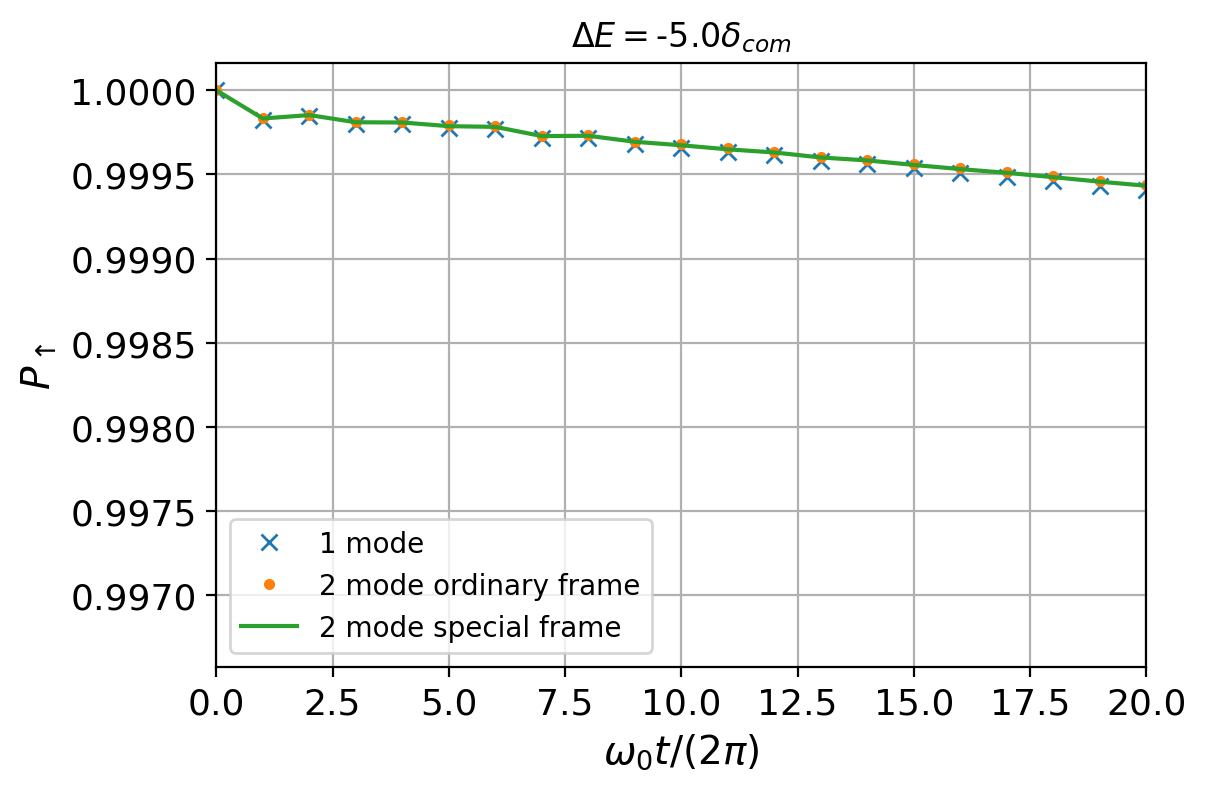

In [11]:
plt.clf()
plt.plot(tplot,rhoee1,'x',label='1 mode')
plt.plot(tplot,rhoee3,'.',label=r'2 mode ordinary frame')
plt.plot(tplot,rhoee2,label=r'2 mode special frame')
title = r'$\Delta E = $' + str(deltaE/delta)+r'$\delta_{com}$'
plt.xlabel(r'$\omega_0t/(2\pi)$',fontsize = 14)
plt.ylabel(r'$P_{\uparrow}$',fontsize = 14)
plt.title(title)
plt.grid()   
plt.xlim(0,20)
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.legend()
plt.show()